In [27]:
#实现代码

导包  
人脸数据fetch_olivetti_faces  
分别使用线性回归，岭回归，KNN进行分析

In [1]:
# 回归问题
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression,Ridge,Lasso

import sklearn.datasets as datasets

In [6]:
# fetch 去某个地方获取
faces = datasets.fetch_olivetti_faces()
data = faces['data']
data.shape

(400, 4096)

In [7]:
64*64

4096

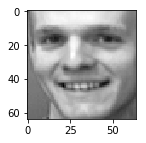

In [10]:
#测试显示图片

index = np.random.randint(0,400,size = 1)[0]

# 黑白图片
image = data[index].reshape(64,64)

# 64*64像素，小

plt.figure(figsize=(2,2))

plt.imshow(image,cmap = 'gray')

In [11]:
# 上半张脸作为数据X
# 下半张脸作为目标值y

X = data[:,:2048]
y = data[:,2048:]

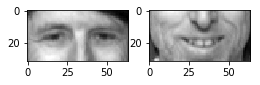

In [12]:
index = np.random.randint(0,400,size = 1)[0]

# 上半张脸
up_face = X[index].reshape(32,64)

# 下半张脸
down_face = y[index].reshape(32,64)

plt.figure(figsize=(4,2))

axes = plt.subplot(1,2,1)

axes.imshow(up_face,cmap = 'gray')

axes = plt.subplot(1,2,2)

axes.imshow(down_face,cmap = 'gray')

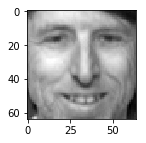

In [13]:
plt.figure(figsize=(2,2))
plt.imshow(data[index].reshape(64,64),cmap = 'gray')

生成训练数据和预测数据

创建机器学习模型，以字典的形式包含四种模型

In [14]:
estimators = {}
estimators['Knn'] = KNeighborsRegressor(n_neighbors=5)
estimators["lrg"] = LinearRegression()
estimators['ridge'] = Ridge(alpha=1)
estimators['lasso'] = Lasso(alpha=1)

使用模型训练数据并预测数据

In [15]:
index = np.arange(400)
np.random.shuffle(index)
index

array([ 76, 368,  25, 173,  79, 398,  97,   2,   9, 342, 338, 380, 347,
       281, 133, 379, 351, 335, 111,  52, 330, 234, 304, 256, 215, 243,
       273, 236, 208,  12, 289, 242,  84, 176, 237,  70,  66, 349, 394,
       124,  69, 151, 318, 118,  10, 170, 145, 200, 102, 366,  42, 164,
       223, 263,  18, 266, 388, 238,  95, 352,  80, 312, 259, 123, 240,
       228, 152, 189,  94, 117, 125, 239, 308,  36, 140, 128,  24, 261,
       229,  73, 348, 299,  21, 373, 168, 355, 130, 262, 172, 249, 290,
       207, 309, 214,  86, 100, 383, 283,   7, 316,  39, 245, 374, 333,
       190, 332, 314, 385, 307,  44, 395, 255, 155, 105, 235,  71, 233,
       297, 246,  62, 119, 269, 382, 360, 160, 202,  99,  11, 101, 321,
        89, 232, 144,  55, 376, 343, 222,  40, 132, 174, 185,   0, 296,
       264, 294,  65, 112,  75,  56,   1, 218, 225,  64, 328, 320,  98,
       285, 370, 157, 166, 129, 150, 377, 371, 356, 393, 254,  20,  19,
       205,  48, 252, 397, 194, 165, 327, 116,  17, 325, 357, 35

In [17]:
# 随机选取了10个测试数据
X_test = X[index[:10]]

# 目标值
y_test = y[index[:10]]

In [18]:
result_ = {}
for key,estimator in estimators.items():
    
    estimator.fit(X,y)
    
    y_ = estimator.predict(X_test)
    
    result_[key] = y_

In [20]:
X_test.shape

(10, 2048)

In [21]:
# 第二种遍历字典方式
for i,key in enumerate(result_):
    print(i,key)

0 Knn
1 lrg
2 ridge
3 lasso


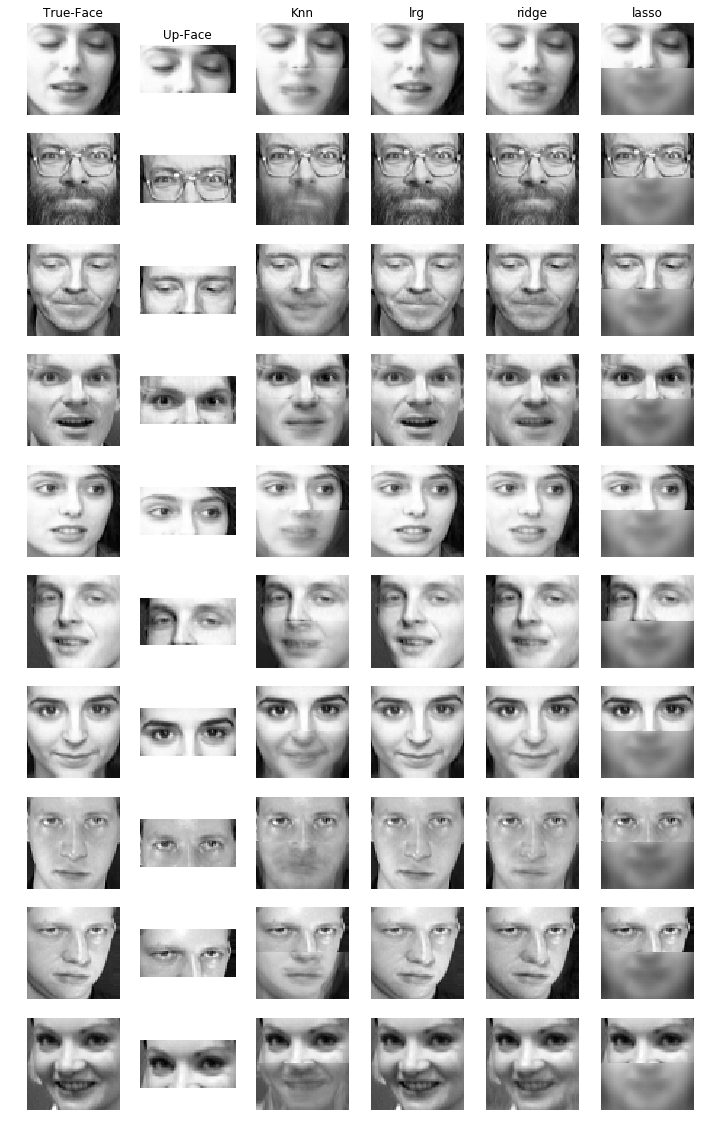

In [22]:
plt.figure(figsize=(6*2,10*2))
for i in range(10):
    
#     绘制第一列
    axes = plt.subplot(10,6,i*6+1)
    up_face = X_test[i]
    down_face = y_test[i]
    face = np.concatenate([up_face,down_face]).reshape(64,64)
    axes.imshow(face,cmap = 'gray')
    axes.axis('off')#关闭坐标刻度
#     给第一列添加标题 True_Face
    if i == 0:
        axes.set_title('True-Face')
        
#     绘制第二列,绘制上半张脸
    axes = plt.subplot(10,6,i*6 +2)
    axes.imshow(up_face.reshape(32,64),cmap = 'gray')
    if i ==0:
        axes.set_title('Up-Face')
    axes.axis('off')
    
    
#     绘制3到6列
#   j： 0,1,2,3
#  当j = 0 表示第三列
#  当j = 1 表示第四列
#  当j = 3 表示第六列
    for j,key in enumerate(result_):
        axes = plt.subplot(10,6,3+i*6 + j)
        
        if i == 0 :
#             将算法名称作为每一列的标题
            axes.set_title(key)
        
#         mix_face 上半张脸和算法预测出来的下半张脸，进行级联合并
        
        y_ = result_[key]
        predict_down_face = y_[i]
        up_face = X_test[i]
        
        mix_face = np.concatenate([up_face,predict_down_face]).reshape(64,64)
        
        axes.imshow(mix_face,cmap = 'gray')
        
        axes.axis('off')

# 线性回归预测的下半张脸
#     y_ = result_['lasso']
    
#     axes = plt.subplot(10,6,i*6 + 3)
    
#     predict_down_face = y_[i]
    
#     mix_face = np.concatenate([up_face,predict_down_face]).reshape(64,64)
    
#     axes.imshow(mix_face,cmap = 'gray')
    
#     if i ==0:
#         axes.set_title('lasso')
        
#     axes.axis('off')

In [23]:
# 真实下半张脸
y_test

array([[0.8016529 , 0.8140496 , 0.822314  , ..., 0.16528925, 0.17355372,
        0.18181819],
       [0.19008264, 0.1983471 , 0.2768595 , ..., 0.18181819, 0.21487603,
        0.22727273],
       [0.17768595, 0.17768595, 0.338843  , ..., 0.2520661 , 0.23553719,
        0.19008264],
       ...,
       [0.19008264, 0.23966943, 0.57438016, ..., 0.14049587, 0.14876033,
        0.15289256],
       [0.5165289 , 0.5495868 , 0.58264464, ..., 0.17355372, 0.17355372,
        0.17355372],
       [0.38842976, 0.5206612 , 0.55785125, ..., 0.446281  , 0.45454547,
        0.46280992]], dtype=float32)

In [24]:
# 预测下半张脸
result_['lrg']

array([[0.8016524 , 0.8140485 , 0.82231414, ..., 0.16528958, 0.1735515 ,
        0.18181577],
       [0.19008222, 0.19834657, 0.27685815, ..., 0.18181856, 0.21487576,
        0.22727191],
       [0.17768592, 0.17768584, 0.3388423 , ..., 0.25206545, 0.23553914,
        0.19008261],
       ...,
       [0.19008444, 0.23967001, 0.57437897, ..., 0.1404953 , 0.14876252,
        0.15289289],
       [0.51652825, 0.5495864 , 0.58264583, ..., 0.17355484, 0.17355329,
        0.17355412],
       [0.3884304 , 0.5206615 , 0.5578503 , ..., 0.44628015, 0.4545443 ,
        0.46280873]], dtype=float32)

In [25]:
y_test.size

20480

In [26]:
(y_test == result_['lrg']).sum()

343